In [1]:
import numpy as np

In [417]:
def step_gd(dt, lrn_rt, m, c) :
    c_itr = int(dt.shape[1]) - 1
    m_sl, c_sl = [], []
    N = len(dt)
    for i in range(c_itr) :
        x = dt[:, i]
        y = dt[:, -1 ]
        m_sl.append(((-2/N) * (y - m[i]*x - c)*x).sum())
        c_sl.append(((-2/N) * (y - m[i]*x -c)).sum())
        
    
    
    m_sl = np.array(m_sl)
    c_sl = np.array(c_sl)
    
    nw_m = m - lrn_rt*(m_sl)
    nw_c = c - lrn_rt*(c_sl.sum())
    
    return nw_m, nw_c
    

In [418]:
def gd(dt, lrn_rt, itr) :
    m, c = np.zeros(26), 0
    for i in range(itr) :
        m, c = step_gd(dt, lrn_rt, m, c)
        #print('Cost : ', cost(dt, m, c))
    return m, c

In [436]:
def mc() :
    import numpy as np
    dt = np.genfromtxt('C:/Users/shiva/OneDrive/Documents/Need/Work/Pers/Files/pyt/proj/Gradient desc/training_boston_x_y_train.csv', delimiter = ',')
    lc = int(dt.shape[1]) - 1
    
    sq = []
    for i in range(lc) :
        sq.append(dt[:,i]**2)
    sq = np.array(sq)
    for i in range(len(sq)) :
        dt = np.insert(dt,(lc,), sq[i, :].reshape(-1,1), axis = 1)
    lrn_rt = 0.00010299999
    itr = 1000
    m, c = gd(dt, lrn_rt, itr)
    return m, c

In [437]:
m, c = mc()             #m and c values from training data
print(m,c)

[-0.66279047  0.55196307 -0.82817799  0.33850914 -0.70540066  1.19985697
 -0.5859227   0.41541649 -0.59099649 -0.75931054 -0.84817077  0.57034638
 -1.29996099  0.14910426 -0.54529456  1.098258    0.26612492  0.03294834
  0.5828793   0.82287709  1.42017444  0.17902576  0.52215103  0.64183656
  0.84709373 -0.24250089] 22.263216471795772


In [438]:
dt = np.genfromtxt('C:/Users/shiva/OneDrive/Documents/Need/Work/Pers/Files/pyt/proj/Gradient desc/training_boston_x_y_train.csv', delimiter = ',')

lc = int(dt.shape[1]) - 1
    
sq = []
for i in range(lc) :
    sq.append(dt[:,i]**2)
sq = np.array(sq)
for i in range(len(sq)) :
    dt = np.insert(dt, (lc,), sq[i, :].reshape(-1,1), axis = 1)


y_tr = dt[:, -1]
x_tr = dt[:, :26]

y_tr_pr = (m*x_tr).sum(axis=1) + c
print(y_tr.shape, y_tr_pr.shape)
print('Score : ', score(y_tr, y_tr_pr))
print(y_tr_pr, y_tr)

(379,) (379,)
Score :  0.0026735056674829227
[ 32.59316988  25.50636383   8.47318985  19.54357284  27.08779602
  40.36917519  20.4242886   26.8473238   28.87916269  57.17535371
  26.50955927  23.56783093  56.92120917  25.82037219  20.83806942
  19.07645437  32.21344863  25.62990908  25.32467429  43.80479039
  28.0985338   32.04956429  42.85787815  30.21745197  28.01597646
  24.86272969  18.34497341  31.88556681  35.72191912  44.87649468
  27.49832981  19.4871771   34.74771166  28.5773472   34.73063953
 -12.19698832  20.15207372  34.5495412   36.99611881  25.27430434
  22.50438096  28.61730585  25.32360997  27.60290792  23.59511169
  19.16213245  24.81049066  25.79169716  28.0740323   13.11040476
  12.08614241  23.43795478  28.40587179  41.383064    39.47112589
  18.92694155  31.11216437  18.617159    31.96410488  41.20776174
  25.87749278  23.66998205  44.30554114  19.64658634  22.94088678
  34.96004422  26.02034322  23.44414336  23.75258848  72.06094617
  23.83167604  34.12395272  18.

In [166]:
x_test = np.genfromtxt('C:/Users/shiva/OneDrive/Documents/Need/Work/Pers/Files/pyt/proj/Gradient desc/test_boston_x_test.csv', delimiter = ',')
m = m.reshape(1,-1)
m = m.reshape(1, -1)
print(x_test.shape)
y_pred = ((m*x_test).sum(axis = 1) + c)
    
print(y_pred)
print(y_pred.shape)

(127, 13)
[ 9.92147648 26.14820254 20.94460151 26.28785984 20.89227796 11.50731648
 25.63357181 23.55674032 20.53813913 23.0464856  24.49021547 20.15277218
 24.07478411 22.23448161 27.14403482 26.34886643 24.64507865 24.43804656
 25.07954066 25.71850795 21.24447508 19.69062207 22.87111935 29.01929236
 30.91805048 13.41343002 21.42306621 27.94553132 21.63095371 25.2474065
 20.2105132  24.10902498 21.79576725 24.34360563 12.4505694  23.93624191
 25.89262371 20.06287894 25.4866487   9.76697851  8.72555059 26.80479388
 29.48185716 18.01434902 16.1584267   7.36033345 27.83284739 22.73980978
 31.29639288 13.90110743 13.64170202 32.71719986 14.06852924 20.22932778
 19.64674959 23.05129789 20.64043578 23.17870703 18.68260333 14.02989015
 10.85284304 23.72465395 23.77810835 24.31671999 13.61277152 12.87917997
 26.23607042 13.78755228 23.05532767 17.92908513 25.41120664 20.26171902
 16.53191386  8.43551574 31.75835948 24.82934542 26.56111678 25.8063782
 12.85378145 31.06078202 15.25849714 20.608

In [167]:
m = m.reshape(1, -1)
m.shape
x_test.shape
y_pred = ((m*x_test).sum(axis = 1) + c)
print(y_pred, y_pred.shape)

[ 9.92147648 26.14820254 20.94460151 26.28785984 20.89227796 11.50731648
 25.63357181 23.55674032 20.53813913 23.0464856  24.49021547 20.15277218
 24.07478411 22.23448161 27.14403482 26.34886643 24.64507865 24.43804656
 25.07954066 25.71850795 21.24447508 19.69062207 22.87111935 29.01929236
 30.91805048 13.41343002 21.42306621 27.94553132 21.63095371 25.2474065
 20.2105132  24.10902498 21.79576725 24.34360563 12.4505694  23.93624191
 25.89262371 20.06287894 25.4866487   9.76697851  8.72555059 26.80479388
 29.48185716 18.01434902 16.1584267   7.36033345 27.83284739 22.73980978
 31.29639288 13.90110743 13.64170202 32.71719986 14.06852924 20.22932778
 19.64674959 23.05129789 20.64043578 23.17870703 18.68260333 14.02989015
 10.85284304 23.72465395 23.77810835 24.31671999 13.61277152 12.87917997
 26.23607042 13.78755228 23.05532767 17.92908513 25.41120664 20.26171902
 16.53191386  8.43551574 31.75835948 24.82934542 26.56111678 25.8063782
 12.85378145 31.06078202 15.25849714 20.60811587 24.1

In [221]:
def score(y_tr, y_pr) :
    u = ((y_tr - y_pr)**2).sum()
    v = ((y_tr - y_tr.mean())**2).sum()
    return 1 - (u/v)

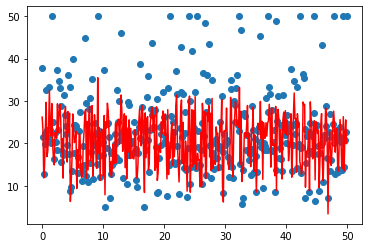

In [182]:
import matplotlib.pyplot as plt
x_ln = np.arange(0, 50, 0.1319261213720317)
x_ln = x_ln.reshape(-1,1)
plt.plot(x_ln, y_tr_pr, 'r')
plt.scatter(x_ln, y_tr)

plt.show()


In [158]:

x_ln.shape

(379, 1)